### Example 3 (Distortion corr)

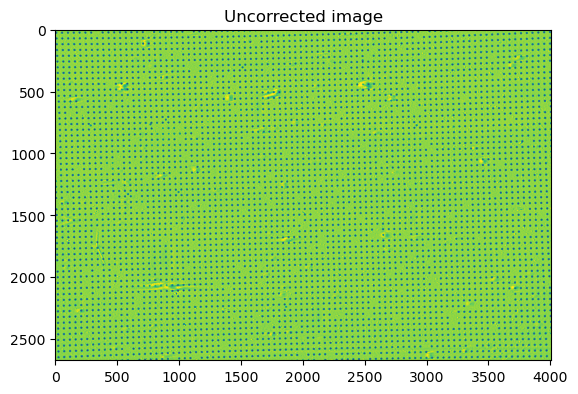

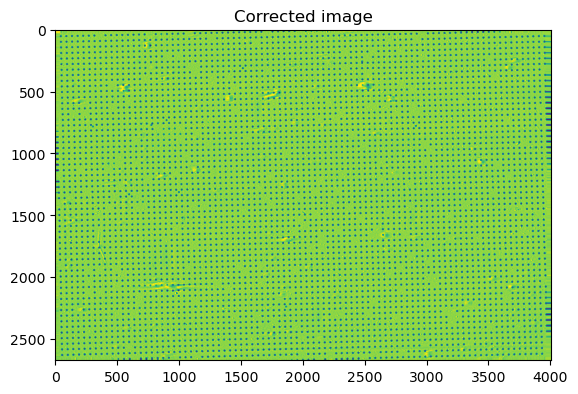

In [1]:
import os
import numpy as np
import cupy as cp
import httomolibgpu
import matplotlib.pyplot as plt
from httomolibgpu.prep.alignment import distortion_correction_proj_discorpy

# Load the projection data
path_lib = os.path.dirname(httomolibgpu.__file__)
in_file = os.path.abspath(
    os.path.join(
        path_lib, "..", "tests/test_data/", "distortion-correction/dot_pattern_03.tif"
    )
)
im_host = plt.imread(in_file)
im = cp.asarray(im_host)

# Define the `preview` to not crop out any of the image
PREVIEW = {"starts": [0, 0], "stops": [im.shape[0], im.shape[1]], "steps": [1, 1]}

# Point to the file containing the distortion coefficients (assumed to be
# calculated in advance of the main processing pipeline)
distortion_coeffs_file_path = os.path.abspath(
    os.path.join(
        path_lib,
        "..",
        "tests/test_data/",
        "distortion-correction/distortion-coeffs.txt",
    )
)

# Apply distortion correction
corrected_images = distortion_correction_proj_discorpy(
    im, distortion_coeffs_file_path, PREVIEW
)
corrected_images = cp.squeeze(corrected_images)

sliceSel = 64
corrected_images_np = corrected_images.get()

plt.figure()
plt.imshow(im_host)
plt.title("Uncorrected image")
plt.show()

plt.figure()
plt.imshow(corrected_images_np)
plt.title("Corrected image")
plt.show()